MORE plot saved as 'more_plot.png'.


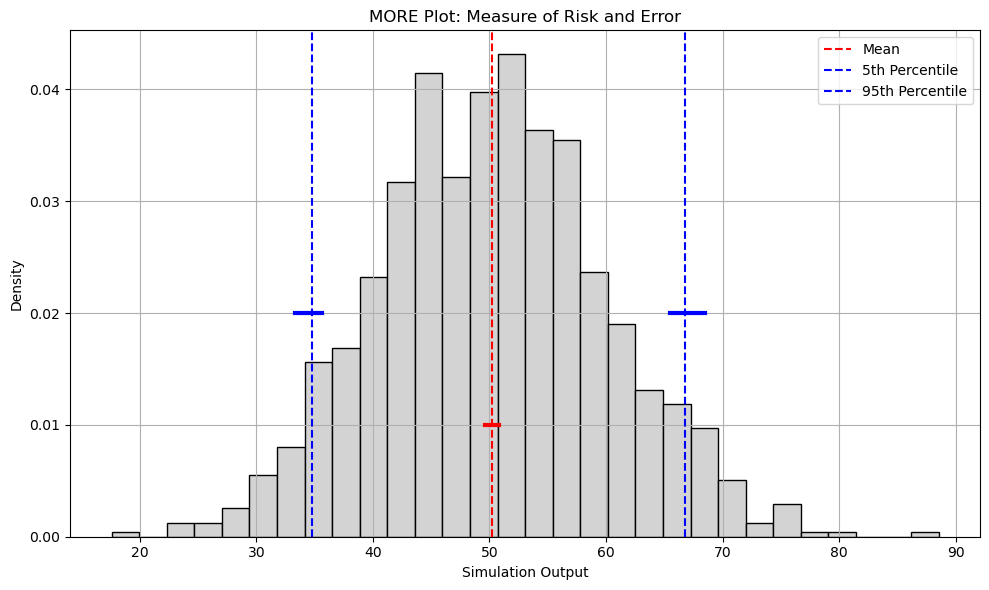

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate example i.i.d. simulation output data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000)
data.sort()

# Sample statistics
n = len(data)
mean = np.mean(data)
std_dev = np.std(data, ddof=1)
sem = std_dev / np.sqrt(n)

# 95% CI for the mean using normal approximation
z = norm.ppf(0.975)
mean_ci = (mean - z * sem, mean + z * sem)

# Percentiles for the risk box
p_low, p_high = 5, 95
percentile_low = np.percentile(data, p_low)
percentile_high = np.percentile(data, p_high)

# CI for percentiles using normal approximation
beta_low = p_low / 100
beta_high = p_high / 100

def percentile_ci(beta):
    se = np.sqrt(beta * (1 - beta) / (n - 1))
    beta1 = beta - z * se
    beta2 = beta + z * se
    idx1 = int(np.floor(n * beta1))
    idx2 = int(np.floor(n * beta2))
    return data[max(0, idx1)], data[min(n - 1, idx2)]

percentile_low_ci = percentile_ci(beta_low)
percentile_high_ci = percentile_ci(beta_high)

# Plotting the MORE plot
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, color='lightgray', edgecolor='black', density=True)

# Plot mean and its CI
plt.axvline(mean, color='red', linestyle='--', label='Mean')
plt.plot([mean_ci[0], mean_ci[1]], [0.01, 0.01], color='red', linewidth=3)

# Plot risk box (percentiles) and their CIs
plt.axvline(percentile_low, color='blue', linestyle='--', label='5th Percentile')
plt.axvline(percentile_high, color='blue', linestyle='--', label='95th Percentile')
plt.plot([percentile_low_ci[0], percentile_low_ci[1]], [0.02, 0.02], color='blue', linewidth=3)
plt.plot([percentile_high_ci[0], percentile_high_ci[1]], [0.02, 0.02], color='blue', linewidth=3)

# Annotate the plot
plt.title('MORE Plot: Measure of Risk and Error')
plt.xlabel('Simulation Output')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig("more_plot.png")
print("MORE plot saved as 'more_plot.png'.")



c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


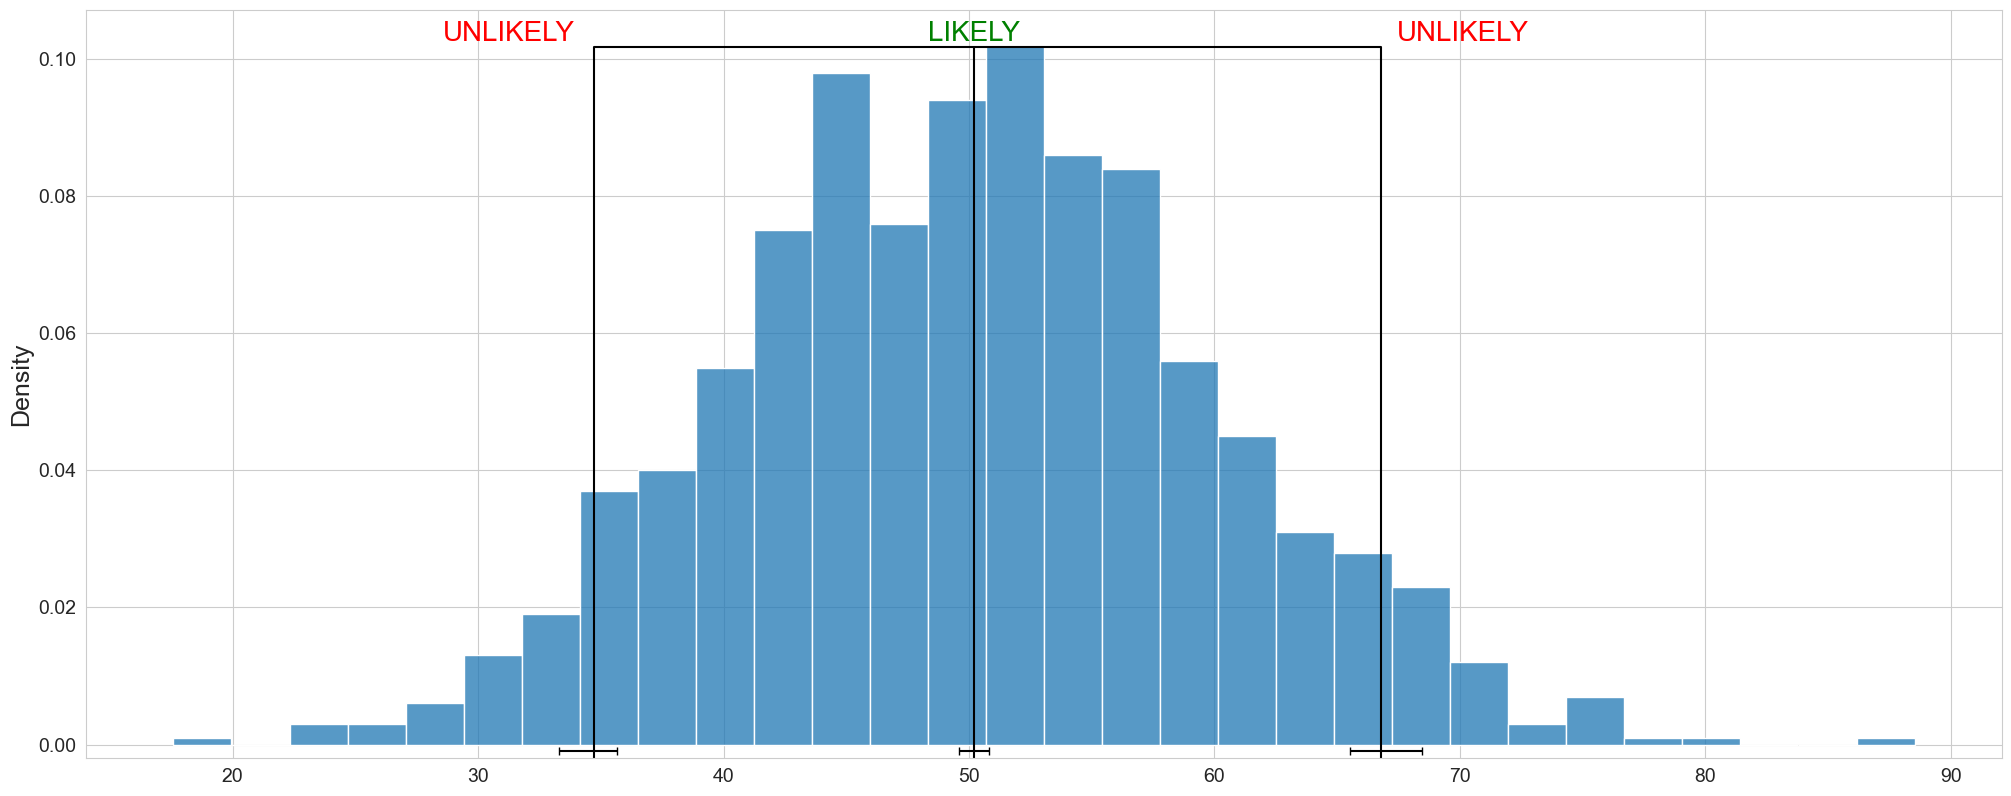

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

sns.set_style("whitegrid")

# Generate example i.i.d. simulation output data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000)
data.sort()

def create_more_plot(data, xlabel=None, figfname=None):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    sem = std_dev / np.sqrt(n)

    z = norm.ppf(0.975)
    mean_ci = (z * sem, z * sem)

    p_low, p_high = 5, 95
    percentile_low = np.percentile(data, p_low)
    percentile_high = np.percentile(data, p_high)


    beta_low = p_low / 100
    beta_high = p_high / 100

    percentile_low_ci = percentile_ci(beta_low, data, n, z)
    percentile_high_ci = percentile_ci(beta_high, data, n, z)

    plt.figure(figsize=(20,8))
    ax = sns.histplot(data, bins=30, stat='probability')

    plt.axvline(mean, 0, 0.95, color='black')
    plt.errorbar(mean, -0.001, xerr= [[mean_ci[0]], [mean_ci[1]]], capsize=3, color="black")

    plt.axvline(percentile_low, 0, 0.95, color='black')
    plt.axvline(percentile_high, 0, 0.95, color='black')

    ymax = ax.get_ylim()[1]
    y_coord = 0.95 * ymax

    ax.hlines(y_coord,percentile_low, percentile_high,color='black')
    plt.errorbar(percentile_low, -0.001, xerr= [[percentile_low - percentile_low_ci[0]], [percentile_low_ci[1] - percentile_low]], capsize=3, color="black")
    plt.errorbar(percentile_high, -0.001, xerr= [[percentile_high - percentile_high_ci[0]], [percentile_high_ci[1] - percentile_high]], capsize=3, color="black")

    ax.text(mean, y_coord, "LIKELY", ha="center", va="bottom", fontsize=20, color="g")
    ax.text(percentile_low*0.90, y_coord, "UNLIKELY", ha="center", va="bottom", fontsize=20, color="r")
    ax.text(percentile_high*1.05, y_coord, "UNLIKELY", ha="center", va="bottom", fontsize=20, color="r")

    # plt.title('MORE Plot: Measure of Risk and Error')
    # plt.xlabel('Simulation Output')
    plt.ylabel('Density')
    plt.tight_layout()

    # plt.legend(fontsize=18)
    ax.set_xlabel(xlabel)

    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    ax.set_ylim(-0.002)
    # ax.set_xlim(0)

    if figfname is not None:
        plt.savefig(figfname, dpi=600)


def percentile_ci(beta, data, n, z):
    se = np.sqrt(beta * (1 - beta) / (n - 1))
    beta1 = beta - z * se
    beta2 = beta + z * se
    idx1 = int(np.floor(n * beta1))
    idx2 = int(np.floor(n * beta2))
    return data[max(0, idx1)], data[min(n - 1, idx2)]


create_more_plot(data)

In [21]:
import os
import json
import pandas as pd

In [22]:
# dfs = []
# for file_num in [*range(50, 101, 5)]:
#     with open(f"results/res1_{file_num}.json", 'r')as fin:
#         res = json.load(fin)

#     tmp_df = pd.DataFrame(res).reset_index().rename({"index":"metric"}, axis=1).melt("metric")
#     tmp_df["num_beds"] = file_num
#     tmp_df.rename({"variable":"max_emerg_wait"}, axis=1, inplace=True)

#     dfs.append(tmp_df)

In [23]:
# Saving res1 to file
# pd.concat(dfs).to_csv("results/res1_combined.csv", index=False)

In [38]:
import json
import pandas as pd

# dfs = []
# for file_num in [*range(50, 101, 5)]:
#     with open(f"results/res1_available_beds_{file_num}.json", 'r')as fin:
#         res = json.load(fin)

#     tmp_df = pd.DataFrame(res).reset_index().rename({"index":"metric"}, axis=1).melt("metric")
#     tmp_df["num_beds"] = file_num
#     tmp_df.rename({"variable":"max_emerg_wait"}, axis=1, inplace=True)

#     dfs.append(tmp_df)

# pd.concat(dfs).to_csv("results/res1_available_beds_combined.csv", index=False)

In [99]:
# # Saving res2 to file

# with open(f"results/res2_additional_capacity_{12}.json", 'r')as fin:
#     res1 = json.load(fin)

# with open(f"results/res2_additional_capacity_{14}.json", 'r')as fin:
#     res2 = json.load(fin)
# res2df = pd.concat([pd.DataFrame(res1), pd.DataFrame(res2)], axis=1)

In [101]:
# res2df.to_csv("results/res2_additional_capacity.csv")

### Res 1 Analysis

In [39]:
df = pd.read_csv("results/res1_available_beds_combined.csv")
df["value"] = df["value"].apply(lambda r: [*map(float, r[1:-1].split(","))])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


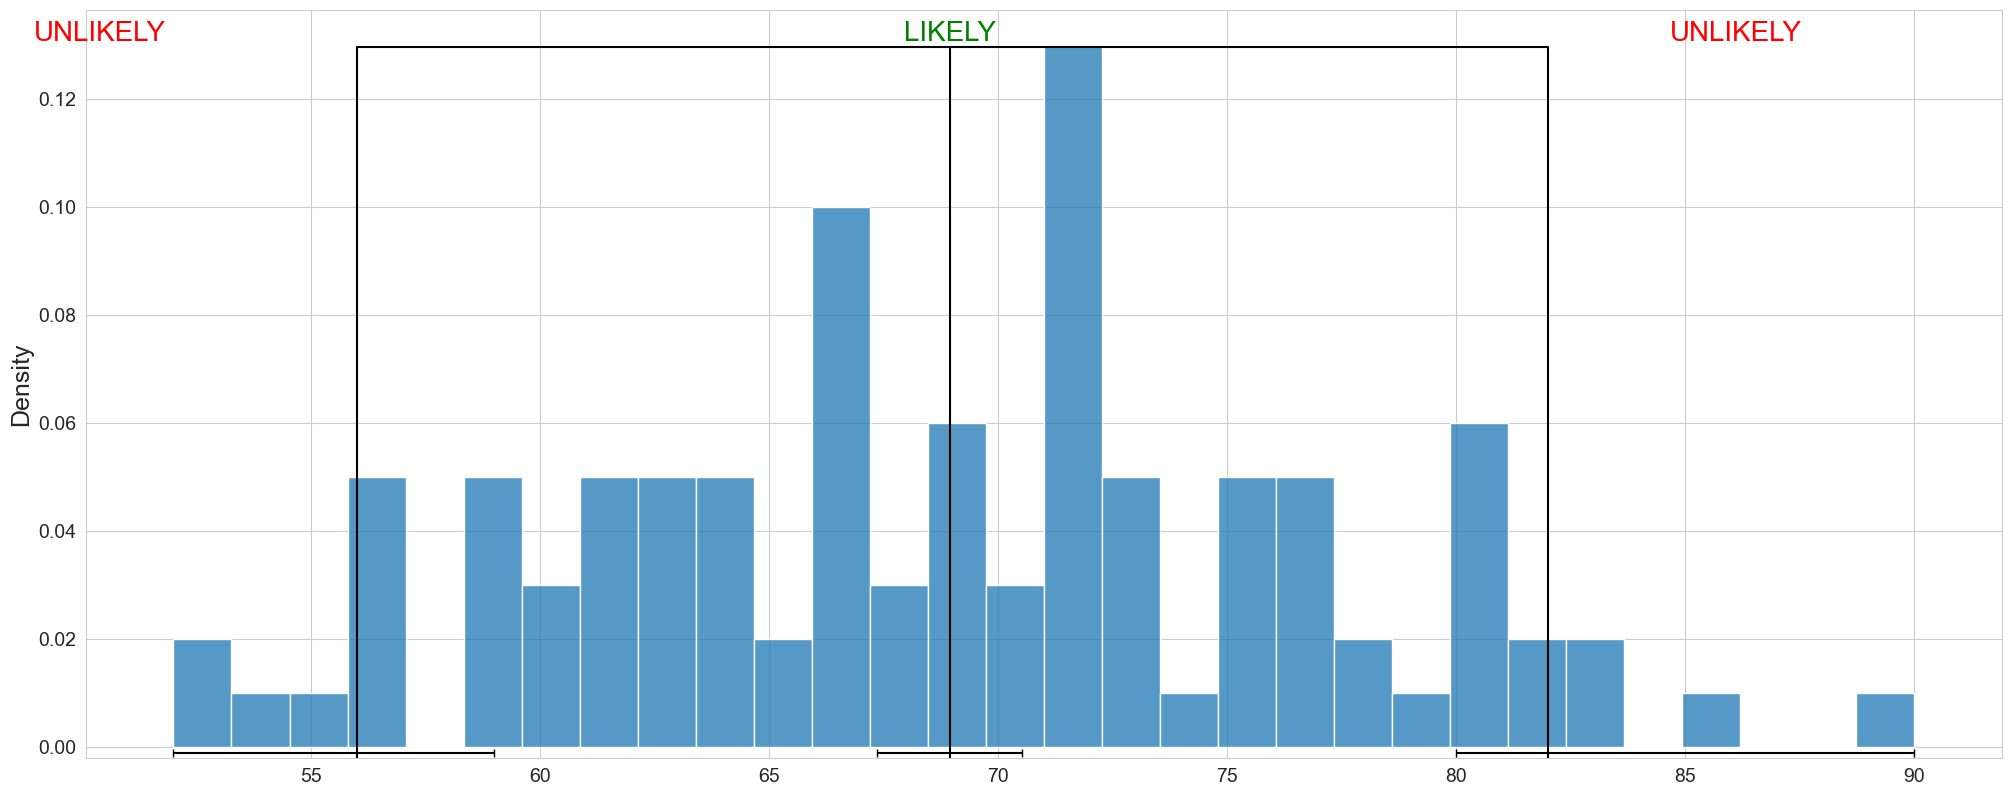

In [46]:
create_more_plot(np.array(sorted(np.array(*df.query("max_emerg_wait == 2 & metric == 'emergency_patients_seen' & num_beds == 50")["value"]))))

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


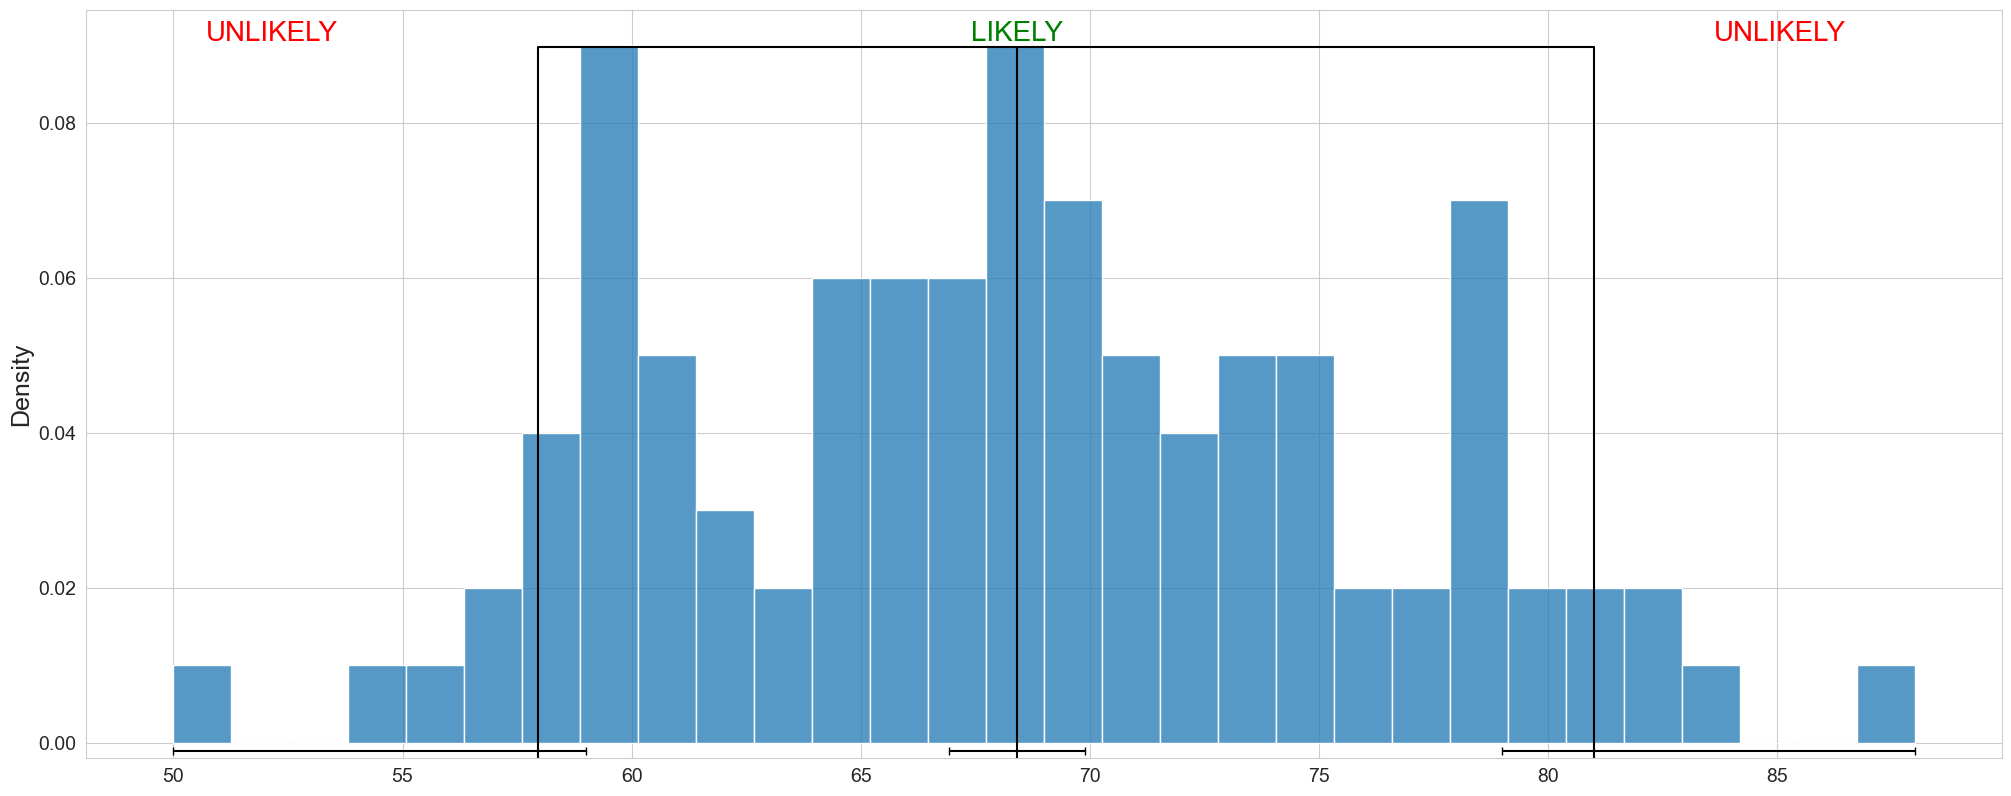

In [48]:
create_more_plot(np.array(sorted(np.array(*df.query("max_emerg_wait == 7 & metric == 'emergency_patients_seen' & num_beds == 50")["value"]))))

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

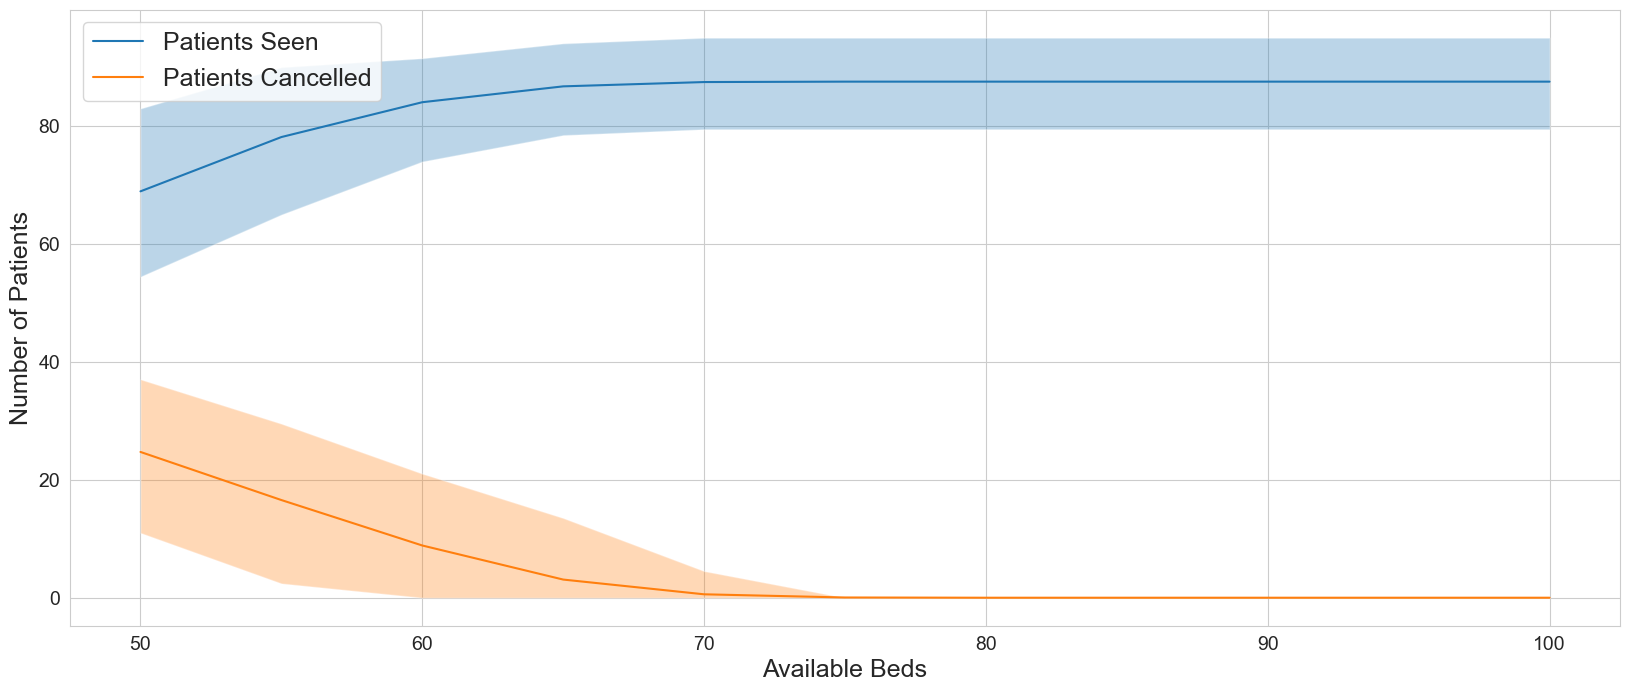

In [49]:
def create_seen_cancelled_plot(df1, df2, fname=None):
    means = df1["value"].apply(lambda r: np.array(r).mean())
    percentile_low = df1["value"].apply(lambda r: np.percentile(r, 2.5))
    percentile_high = df1["value"].apply(lambda r: np.percentile(r, 97.5))

    plt.figure(figsize=(20,8))

    ax = sns.lineplot(x = df1["num_beds"], y=means, label="Patients Seen")

    ax.fill_between(
        df1["num_beds"], 
        percentile_low, 
        percentile_high,
        alpha=0.3
    )


    means = df2["value"].apply(lambda r: np.array(r).mean())
    percentile_low = df2["value"].apply(lambda r: np.percentile(r, 2.5))
    percentile_high = df2["value"].apply(lambda r: np.percentile(r, 97.5))

    sns.lineplot(x = df2["num_beds"], y=means, ax=ax, label="Patients Cancelled")
    ax.fill_between(
        df2["num_beds"], 
        percentile_low, 
        percentile_high,
        alpha=0.3
    )

    plt.legend(fontsize=18)
    ax.set_xlabel("Available Beds")
    ax.set_ylabel("Number of Patients")

    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    if fname is not None:
        plt.savefig(fname, dpi=600)

create_seen_cancelled_plot(df.query(f"max_emerg_wait == 2 & metric == 'emergency_patients_seen'"), df.query("max_emerg_wait == 2 & metric == 'emergency_patients_cancelled'"))

In [50]:
hists = []

tmp_df = df.query(f"max_emerg_wait == 2 & metric == 'emergency_patients_seen'")
max_bins = int(round(tmp_df["value"].apply(lambda r: max(r)).max()*1.2))

for row in tmp_df["value"]:
    hists.append(np.histogram(row, bins=range(0, max_bins, 2))[0])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

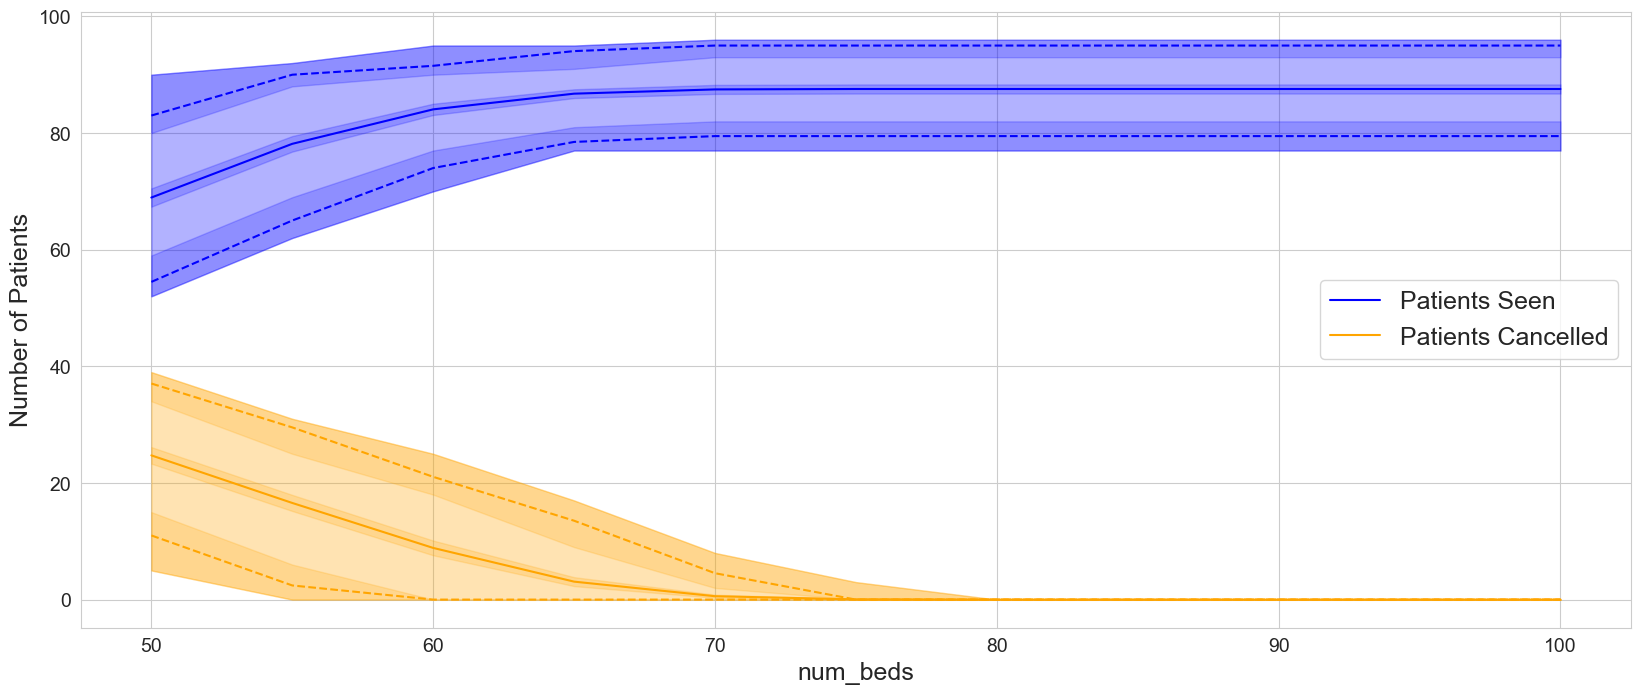

<Figure size 2000x800 with 0 Axes>

In [53]:
def create_seen_cancelled_plot2(df1, df2, x_col="num_beds", fname=None):
    means = df1["value"].apply(lambda r: np.array(r).mean())
    low = df1["value"].apply(lambda r: np.percentile(r, 0))
    high = df1["value"].apply(lambda r: np.percentile(r, 100))

    percentile_low = df1["value"].apply(lambda r: np.percentile(r, 2.5))
    percentile_high = df1["value"].apply(lambda r: np.percentile(r, 97.5))

    plt.figure(figsize=(20,8))

    ax = sns.lineplot(x = df1[x_col], y=means, label="Patients Seen", color='b')
    sns.lineplot(x = df1[x_col], y = percentile_low, linestyle='--', color='b', ax=ax)
    sns.lineplot(x = df1[x_col], y = percentile_high, linestyle='--', color='b', ax=ax)

    n = len(df1["value"].iloc[0])
    std_dev = df1["value"].apply(lambda r: np.array(r).std())
    sem = std_dev / np.sqrt(n)

    z = norm.ppf(0.975)
    mean_ci = (means - z * sem, means + z * sem)

    beta_low = 5 / 100
    beta_high = 95 / 100

    low_ci = calculate_percentile_ci(beta_low, df1, n, z)
    low_ci = [*zip(*low_ci)]

    high_ci = calculate_percentile_ci(beta_high, df1, n, z)
    high_ci = [*zip(*high_ci)]

    ax.fill_between(
        df1[x_col], 
        low, 
        high,
        alpha=0.3,
        color='b'
    )
    ax.fill_between(
        df1[x_col],
        mean_ci[0],
        mean_ci[1],
        alpha=0.2,
        color='b'
    )
    ax.fill_between(
        df1[x_col],
        low_ci[0],
        low_ci[1],
        alpha=0.2,
        color='b'
    )
    ax.fill_between(
        df1[x_col],
        high_ci[0],
        high_ci[1],
        alpha=0.2,
        color='b'
    )


    means = df2["value"].apply(lambda r: np.array(r).mean())
    low = df2["value"].apply(lambda r: np.percentile(r, 0))
    high = df2["value"].apply(lambda r: np.percentile(r, 100))

    percentile_low = df2["value"].apply(lambda r: np.percentile(r, 2.5))
    percentile_high = df2["value"].apply(lambda r: np.percentile(r, 97.5))

    plt.figure(figsize=(20,8))

    sns.lineplot(x = df2[x_col], y=means, label="Patients Cancelled", color='orange', ax=ax)
    sns.lineplot(x = df2[x_col], y = percentile_low, linestyle='--', color='orange', ax=ax)
    sns.lineplot(x = df2[x_col], y = percentile_high, linestyle='--', color='orange', ax=ax)

    n = len(df2["value"].iloc[0])
    std_dev = df2["value"].apply(lambda r: np.array(r).std())
    sem = std_dev / np.sqrt(n)

    z = norm.ppf(0.975)
    mean_ci = (means - z * sem, means + z * sem)

    beta_low = 5 / 100
    beta_high = 95 / 100

    low_ci = calculate_percentile_ci(beta_low, df2, n, z)
    low_ci = [*zip(*low_ci)]

    high_ci = calculate_percentile_ci(beta_high, df2, n, z)
    high_ci = [*zip(*high_ci)]

    ax.fill_between(
        df2[x_col], 
        low, 
        high,
        alpha=0.3,
        color='orange'
    )
    ax.fill_between(
        df2[x_col],
        mean_ci[0],
        mean_ci[1],
        alpha=0.2,
        color='orange'
    )
    ax.fill_between(
        df2[x_col],
        low_ci[0],
        low_ci[1],
        alpha=0.2,
        color='orange'
    )
    ax.fill_between(
        df2[x_col],
        high_ci[0],
        high_ci[1],
        alpha=0.2,
        color='orange'
    )


    ax.legend(fontsize=18)
    # ax.set_xlabel("Available Beds")
    ax.set_xlabel(x_col)
    ax.set_ylabel("Number of Patients")

    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    if fname is not None:
        plt.savefig(fname, dpi=600)

def calculate_percentile_ci(beta, df, n, z):
    se = np.sqrt(beta * (1 - beta) / (n - 1))
    beta1 = beta - z * se
    beta2 = beta + z * se

    idx1 = int(np.floor(n * beta1))
    idx2 = int(np.floor(n * beta2))

    return df["value"].apply(lambda r: (sorted(r)[max(0, idx1)], sorted(r)[min(n - 1, idx2)]))

create_seen_cancelled_plot2(df.query(f"max_emerg_wait == 2 & metric == 'emergency_patients_seen'"), df.query("max_emerg_wait == 2 & metric == 'emergency_patients_cancelled'"))

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

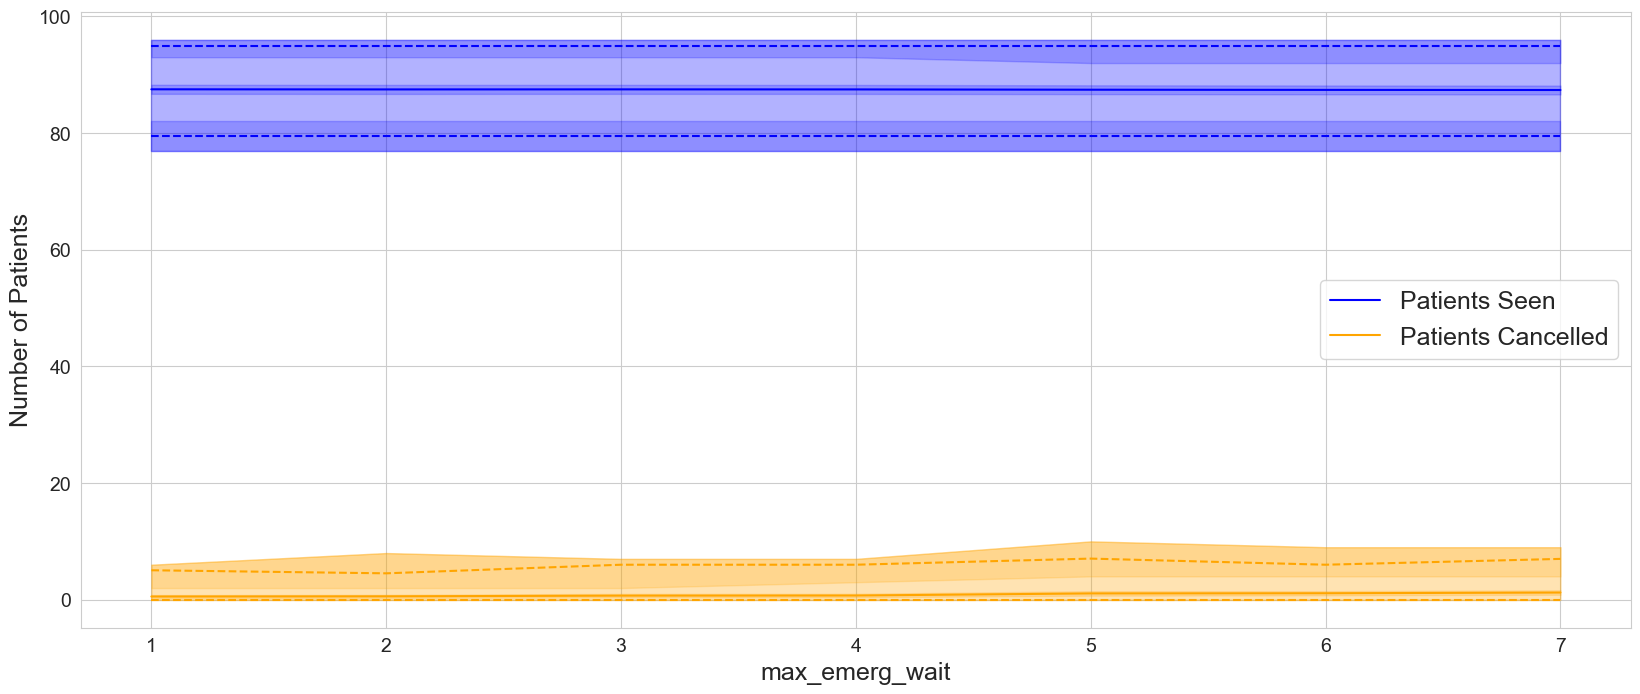

<Figure size 2000x800 with 0 Axes>

In [59]:
create_seen_cancelled_plot2(df.query(f"num_beds == 70 & metric == 'emergency_patients_seen'"), df.query("num_beds == 70 & metric == 'emergency_patients_cancelled'"), "max_emerg_wait")

C:\Users\christopher.sampson\AppData\Local\Temp\ipykernel_5332\3819672459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["means"]=df["value"].apply(lambda r: np.mean(r))


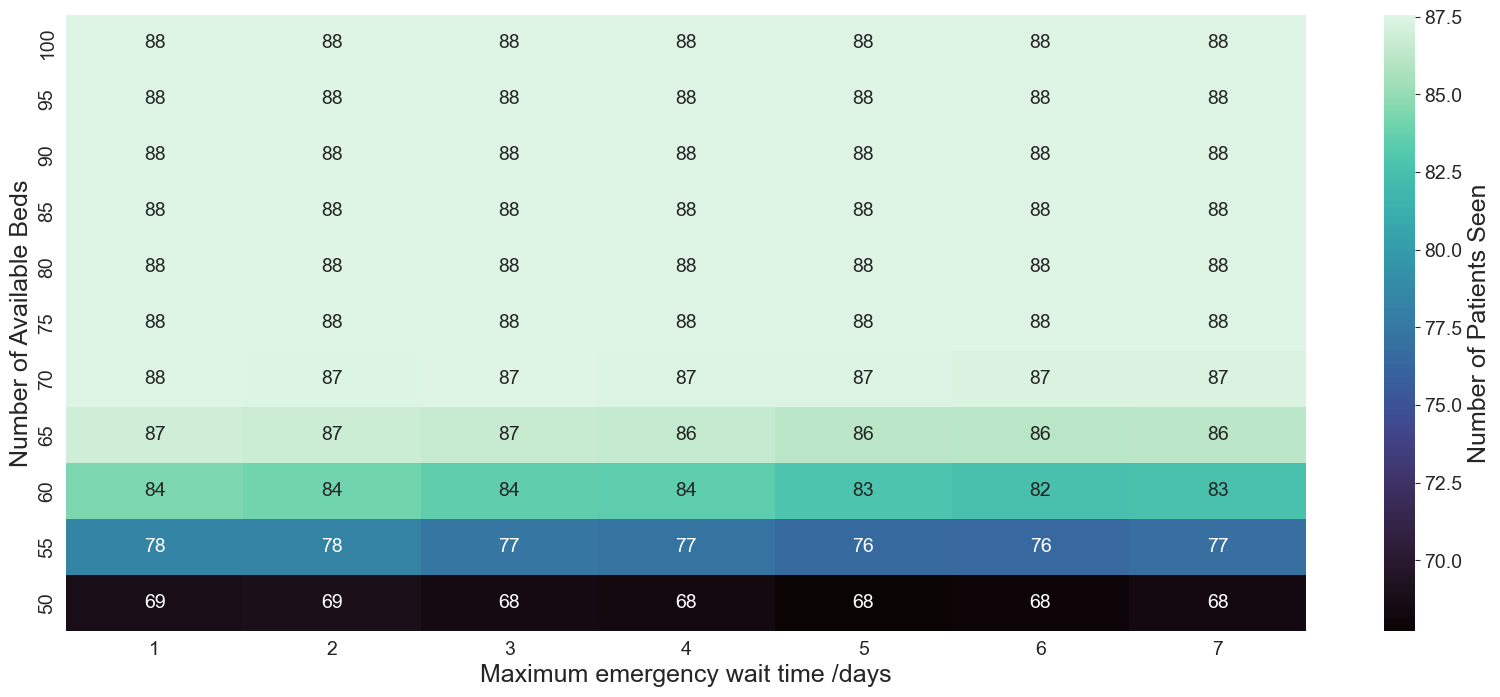

In [98]:

def plot_heatmap(df, fname=None):
    fig = plt.figure(figsize=(20, 8))

    df["means"]=df["value"].apply(lambda r: np.mean(r))

    ax = sns.heatmap(df.pivot(index="num_beds",columns="max_emerg_wait",values="means"), cbar_kws={'label': 'Number of Patients Seen'}, cmap='mako',annot=True, annot_kws={'size':14})
    ax.invert_yaxis()

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    ax.figure.axes[-1].yaxis.label.set_size(18)
    

    # ax.set_xlabel("Available Beds")
    ax.set_xlabel("Maximum emergency wait time /days")
    ax.set_ylabel("Number of Available Beds")

    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    if fname is not None:
        plt.savefig(fname, dpi=600)

plot_heatmap(df.query("metric == 'emergency_patients_seen'"))

## Emergency Event



In [144]:
emerg_df = pd.read_csv("results/res2_additional_capacity.csv",index_col=0)
emerg_df = pd.DataFrame([[[*map(float, y[1:-1].split(","))] for y in x] for x in emerg_df.values], columns=emerg_df.columns, index=emerg_df.index)
emerg_df=emerg_df.reset_index().melt(id_vars=["index"]).rename({"index":"metric","variable":"num_days"},axis=1)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

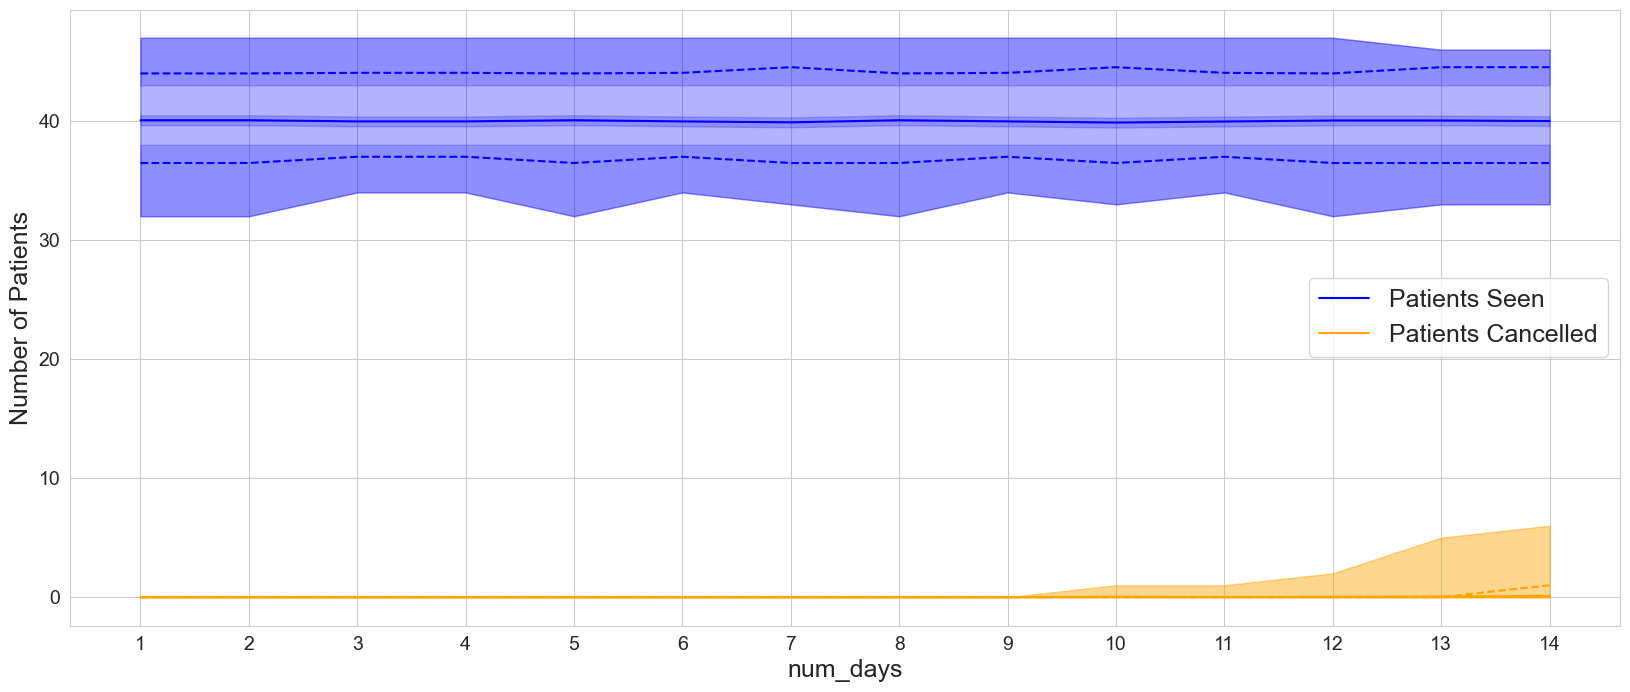

<Figure size 2000x800 with 0 Axes>

In [150]:
create_seen_cancelled_plot2(emerg_df.query("metric == 'elective_patients_seen'"), emerg_df.query("metric == 'elective_patients_cancelled'"), "num_days")

In [ ]:
# TODO:
# Condense each result into a single source of data (which can then be added to the data folder!)

# MORE plots for:
    # Reducing beds, 48 hours max emergency wait
    # Increasing max emergency wait (80 beds?)
    # Emergency event, increasing capacity 5 hours per day emergency

        # emergency_patients_seen
        # elective_patients_seen
        # daycase_patients_seen

        # emergency_patients_cancelled
        # elective_patients_cancelled
        # daycase_patients_cancelled

        # emergency_surgery / total emergency 
        # elective_surgery / total emergency
        # daycase_surgery / total emergency

# Heatplot of reducing beds AND increasing emergency wait
# MORE plot for timeseries data? (for the discussion)
